In [1]:
#Импорты библиотек
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.metrics.pairwise import pairwise_distances
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, log_loss
from sklearn.kernel_ridge import KernelRidge
import torch
#from nltk import RegexpTokenizer
from func import analize_df, replace_outliers, find_outliers, popular_tok
import warnings
warnings.filterwarnings('ignore')

In [2]:
#юзер для выдачи рекомендаций рекомендаций по умолчанию
user=6848918
#Собираем единый датасет с оценками
df_votes=pd.concat([pd.read_csv('movie_votes.csv',sep='|'), pd.read_csv('series_votes.csv',sep='|')], axis=0)
df_votes=df_votes.drop_duplicates()
df_votes.head()
df_votes.shape

(36464175, 4)

In [3]:
#Загрузить датасет в Python. Изучаем содержимое

df = pd.read_csv('movie_info.csv',sep='|')

df.head()

,id,type,genre,title_russian,title_original,production_year,countries,actors,director,writer,...,world_box,awards,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,world_premiere
0,447301,Film,"['фантастика', 'боевик', 'триллер', 'драма', '...",Начало,Inception,2010.0,"['США', 'Великобритания']","['37859', '9867', '43503', '39984', '30759', '...",['41477'],['41477'],...,8.283220e+08,"['Оскар за Лучшая работа оператора', 'Оскар за...",2084916,8.8,749753,8.660,359,8.1,148,2010-07-08
1,361,Film,"['триллер', 'драма', 'криминал']",Бойцовский клуб,Fight Club,1999.0,"['США', 'Германия']","['25774', '25584', '25775', '14127', '25776', ...",['2944'],"['25773', '25772']",...,1.008538e+08,[],1869371,8.8,596063,8.641,177,7.4,139,1999-09-10
2,258687,Film,"['фантастика', 'драма', 'приключения']",Интерстеллар,Interstellar,2014.0,"['США', 'Великобритания', 'Канада']","['797', '38703', '1111242', '2007922', '3711',...",['41477'],"['55539', '41477']",...,6.778968e+08,['Оскар за Лучшие визуальные эффекты'],1529450,8.6,667884,8.600,366,7.1,169,2014-10-26
3,435,Film,"['фэнтези', 'драма', 'криминал', 'детектив']",Зеленая миля,The Green Mile,1999.0,['США'],"['9144', '12759', '22527', '677', '20664', '89...",['24262'],"['24262', '24263']",...,2.868014e+08,[],1158184,8.6,652888,9.061,134,6.8,189,1999-12-06
4,2213,Film,"['мелодрама', 'история', 'триллер', 'драма']",Титаник,Titanic,1997.0,"['США', 'Мексика', 'Австралия', 'Канада']","['37859', '21709', '45019', '379', '22961', '2...",['27977'],['27977'],...,2.127488e+09,"['Оскар за Лучший фильм', 'Оскар за Лучший реж...",1053998,7.8,546983,8.363,193,8.0,194,1997-11-01


In [4]:
analize_df(df)
df.head(10)

dtypes
id                                  int64
type                               object
genre                              object
title_russian                      object
title_original                     object
production_year                   float64
countries                          object
actors                             object
director                           object
writer                             object
producer                           object
operator                           object
composer                           object
editor                             object
budget                            float64
world_box                         float64
awards                             object
rating_imdb_count                   int64
rating_imdb_value                 float64
rating_kinopoisk_count              int64
rating_kinopoisk_value            float64
rating_worldwide_critics_count      int64
rating_worldwide_critics_value    float64
duration                   

producer
[]                                             11472
['180600']                                       269
['202698']                                       151
['996210']                                       132
['154422']                                       114
                                               ...  
['4445441', '4445442']                             1
['1190284', '5580860']                             1
['1922136', '4275819', '438521', '1051121']        1
['3341783', '724833', '1177532', '1872150']        1
['1784478', '907768', '1191787', '35875']          1
Name: count, Length: 58292, dtype: int64



operator 23597 !!!!!!!!!!!!!!!!!!!!!!/
operator
[]                      14550
['310675']                204
['1614873']                76
['223119']                 74
['1001436']                72
                        ...  
['369333']                  1
['1779920']                 1
['340021', '341131']        1
['1923772']                 1
['2249921']     

,id,type,genre,title_russian,title_original,production_year,countries,actors,director,writer,...,world_box,awards,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,world_premiere
0,447301,Film,"['фантастика', 'боевик', 'триллер', 'драма', '...",Начало,Inception,2010.0,"['США', 'Великобритания']","['37859', '9867', '43503', '39984', '30759', '...",['41477'],['41477'],...,8.283220e+08,"['Оскар за Лучшая работа оператора', 'Оскар за...",2084916,8.8,749753,8.660,359,8.1,148,2010-07-08
1,361,Film,"['триллер', 'драма', 'криминал']",Бойцовский клуб,Fight Club,1999.0,"['США', 'Германия']","['25774', '25584', '25775', '14127', '25776', ...",['2944'],"['25773', '25772']",...,1.008538e+08,[],1869371,8.8,596063,8.641,177,7.4,139,1999-09-10
2,258687,Film,"['фантастика', 'драма', 'приключения']",Интерстеллар,Interstellar,2014.0,"['США', 'Великобритания', 'Канада']","['797', '38703', '1111242', '2007922', '3711',...",['41477'],"['55539', '41477']",...,6.778968e+08,['Оскар за Лучшие визуальные эффекты'],1529450,8.6,667884,8.600,366,7.1,169,2014-10-26
3,435,Film,"['фэнтези', 'драма', 'криминал', 'детектив']",Зеленая миля,The Green Mile,1999.0,['США'],"['9144', '12759', '22527', '677', '20664', '89...",['24262'],"['24262', '24263']",...,2.868014e+08,[],1158184,8.6,652888,9.061,134,6.8,189,1999-12-06
4,2213,Film,"['мелодрама', 'история', 'триллер', 'драма']",Титаник,Titanic,1997.0,"['США', 'Мексика', 'Австралия', 'Канада']","['37859', '21709', '45019', '379', '22961', '2...",['27977'],['27977'],...,2.127488e+09,"['Оскар за Лучший фильм', 'Оскар за Лучший реж...",1053998,7.8,546983,8.363,193,8.0,194,1997-11-01
5,251733,Film,"['фантастика', 'боевик', 'драма', 'приключения']",Аватар,Avatar,2009.0,['США'],"['17733', '10661', '6915', '2807', '2318', '99...",['27977'],['27977'],...,2.743578e+09,"['Золотой глобус за Лучший фильм (драма)', 'Зо...",1124340,7.8,573500,7.936,319,7.4,162,2009-12-10
6,389,Film,"['боевик', 'триллер', 'драма', 'криминал']",Леон,Léon,1994.0,"['Франция', 'США']","['11505', '24285', '6650', '14316', '10514', '...",['24505'],['24505'],...,1.955264e+07,[],1043676,8.5,499513,8.676,65,6.9,133,1994-09-14
7,301,Film,"['фантастика', 'боевик']",Матрица,The Matrix,1999.0,['США'],"['7836', '9838', '6226', '1491', '23331', '903...","['23330', '23329']","['23329', '23330']",...,4.635174e+08,"['Оскар за Лучший звук', 'Оскар за Лучший монт...",1689716,8.7,501425,8.489,155,7.8,136,1999-03-24
8,342,Film,"['триллер', 'комедия', 'криминал']",Криминальное чтиво,Pulp Fiction,1994.0,['США'],"['6479', '7164', '110', '29595', '24355', '214...",['7640'],"['7640', '17501']",...,2.139288e+08,['Каннский кинофестиваль за Золотая пальмовая ...,1840605,8.9,499814,8.619,107,9.2,154,1994-05-21
9,42664,Film,"['фантастика', 'комедия', 'приключения']",Иван Васильевич меняет профессию,NaN,1973.0,['СССР'],"['284624', '25269', '185644', '109509', '10254...",['191587'],"['284597', '191587', '266079']",...,NaN,[],15200,8.4,673752,8.781,0,NaN,88,1973-09-17


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
#Процент пересечений
print(pd.read_csv('movie_info.csv',sep='|').merge(pd.read_csv('tags.csv',sep='|'), left_on='id', right_on='id', how='inner').shape[0]/df.shape[0])

0.6680100693195768


In [7]:
df=pd.read_csv('movie_info.csv',sep='|').merge(pd.read_csv('tags.csv',sep='|'), left_on='id', right_on='id', how='left')
df=df.drop_duplicates()
df.head()

,id,type,genre,title_russian,title_original,production_year,countries,actors,director,writer,...,awards,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,world_premiere,tags
0,447301,Film,"['фантастика', 'боевик', 'триллер', 'драма', '...",Начало,Inception,2010.0,"['США', 'Великобритания']","['37859', '9867', '43503', '39984', '30759', '...",['41477'],['41477'],...,"['Оскар за Лучшая работа оператора', 'Оскар за...",2084916,8.8,749753,8.660,359,8.1,148,2010-07-08,"['2010-е', 'Авария поезда', 'Автокатастрофа', ..."
1,361,Film,"['триллер', 'драма', 'криминал']",Бойцовский клуб,Fight Club,1999.0,"['США', 'Германия']","['25774', '25584', '25775', '14127', '25776', ...",['2944'],"['25773', '25772']",...,[],1869371,8.8,596063,8.641,177,7.4,139,1999-09-10,"['1990-е', 'Starbucks', 'Автомобиль марки Линк..."
3,258687,Film,"['фантастика', 'драма', 'приключения']",Интерстеллар,Interstellar,2014.0,"['США', 'Великобритания', 'Канада']","['797', '38703', '1111242', '2007922', '3711',...",['41477'],"['55539', '41477']",...,['Оскар за Лучшие визуальные эффекты'],1529450,8.6,667884,8.600,366,7.1,169,2014-10-26,"['21-й век', '70-ти миллиметровая пленка', 'IM..."
4,435,Film,"['фэнтези', 'драма', 'криминал', 'детектив']",Зеленая миля,The Green Mile,1999.0,['США'],"['9144', '12759', '22527', '677', '20664', '89...",['24262'],"['24262', '24263']",...,[],1158184,8.6,652888,9.061,134,6.8,189,1999-12-06,"['1930-е', 'Беспокойство', 'Блокбастер', 'Высш..."
6,2213,Film,"['мелодрама', 'история', 'триллер', 'драма']",Титаник,Titanic,1997.0,"['США', 'Мексика', 'Австралия', 'Канада']","['37859', '21709', '45019', '379', '22961', '2...",['27977'],['27977'],...,"['Оскар за Лучший фильм', 'Оскар за Лучший реж...",1053998,7.8,546983,8.363,193,8.0,194,1997-11-01,"['1910-е', '1912 год', '1990-е', '1996 год', '..."


In [8]:
analize_df(df)

dtypes
id                                  int64
type                               object
genre                              object
title_russian                      object
title_original                     object
production_year                   float64
countries                          object
actors                             object
director                           object
writer                             object
producer                           object
operator                           object
composer                           object
editor                             object
budget                            float64
world_box                         float64
awards                             object
rating_imdb_count                   int64
rating_imdb_value                 float64
rating_kinopoisk_count              int64
rating_kinopoisk_value            float64
rating_worldwide_critics_count      int64
rating_worldwide_critics_value    float64
duration                   

producer
[]                                             11472
['180600']                                       269
['202698']                                       151
['996210']                                       132
['154422']                                       114
                                               ...  
['4445441', '4445442']                             1
['1190284', '5580860']                             1
['1922136', '4275819', '438521', '1051121']        1
['3341783', '724833', '1177532', '1872150']        1
['1784478', '907768', '1191787', '35875']          1
Name: count, Length: 58292, dtype: int64



operator 23597 !!!!!!!!!!!!!!!!!!!!!!/
operator
[]                      14550
['310675']                204
['1614873']                76
['223119']                 74
['1001436']                72
                        ...  
['369333']                  1
['1779920']                 1
['340021', '341131']        1
['1923772']                 1
['2249921']     

In [9]:
#Восстанавливаем пропущенную информацию (по возможности)
cor_data_recovery=df['title_russian'].isnull()
df['title_russian'][cor_data_recovery]=df['title_original'][cor_data_recovery]

cor_data_recovery=df['title_original'].isnull()
df['title_original'][cor_data_recovery]=df['title_russian'][cor_data_recovery]

In [10]:
#Тесстовый запуск на 10 фильмов из уже посмотренных пользователем, что даёт возможность посмотреть их оценки
df_votes=pd.concat([pd.read_csv('movie_votes.csv',sep='|'), pd.read_csv('series_votes.csv',sep='|')], axis=0)
df_votes=df_votes.drop_duplicates()
print(df_votes.shape)
df_votes.head()

(36464175, 4)


,user_id,movie_id,score,time
0,15647798,568289,9,1542847800
1,15647798,435,8,1542847860
2,15647798,535341,9,1542847920
3,15647798,389,8,1542847920
4,15647798,361,8,1542847920


Первый вариант

In [11]:
#Определение схожих пользователей
#u_id - id
#df_votes - датасет с оценками
#user_num - количество пользователей на выьорку
#sim_user_num - сколько пользователей подобрать в "топ совпавших пользователей"
#rewatch - выводить те фильмы которые пользователь уже смотрел (для тестирования) 
def similar_user_recomend(u_id,df_votes=df_votes, user_num=500, sim_user_num=7,rewatch=False):
    def scale_id(c_id):
        scaled = np.where(ids_l == c_id)[0][0] + 1
        return scaled
    def k_fract_mean_predict(top, isk):
        user_sim = user_similarity[isk]
        top_sim_users = user_sim.argsort()[1:top + 1]
            
        abs_sim = np.abs(user_sim)
        pred = np.zeros((n_movies))
    
        indexes = top_sim_users.astype(int)
        numerator = user_similarity[isk][indexes]
        
        
        df_top = df_votes_matrix[isk]
        mean_rating = df_top[df_top>0].mean()
    
        diff_ratings = df_votes_matrix[indexes] - df_votes_matrix[indexes].mean(axis=1).reshape(top,1)
        
        numerator = numerator.dot(diff_ratings)
        denominator = abs_sim[indexes].sum()
        pred = mean_rating + numerator / denominator
        return pred
    user_mov_list = df_votes[df_votes['user_id']==u_id]['movie_id'].values
    usr_list=df_votes[df_votes['movie_id'].isin(user_mov_list)]['user_id'].value_counts().index[:user_num]
    df_votes=df_votes[df_votes['user_id'].isin(usr_list)]
    
    df_votes_torch = torch.tensor([df_votes['user_id'].values, df_votes['movie_id'].values, df_votes['score'].values]).to('cpu')

    for i in range (2):
        ids_l = df_votes_torch[i].unique()
        df_votes_torch[i] = df_votes_torch[i].apply_(scale_id)
        df_votes_torch[i]-=1
    isk=df_votes_torch[0][0]

    n_movies= df_votes_torch[1].unique().shape[0]
    df_votes_matrix = torch.zeros((df_votes_torch[0].unique().shape[0], n_movies))

    for i in range (10):
        cor_data_recovery=df_votes_torch[2]==i
        df_votes_matrix[df_votes_torch[0][cor_data_recovery], df_votes_torch[1][cor_data_recovery]] = i



    # считаем косинусное расстояние для пользователей и фильмов 
    # (построчно и поколоночно соотвественно).
    user_similarity = pairwise_distances(df_votes_matrix, metric='cosine')
    item_similarity = pairwise_distances(df_votes_matrix.T, metric='cosine')


    k_predict = k_fract_mean_predict(sim_user_num, isk)

    out=df_votes['movie_id'].unique()[k_predict.argsort()]
    out=out[pd.Series(out).isin(user_mov_list)==rewatch]
    return(out)

In [12]:
#Тесстовый запуск на 10 фильмов из уже посмотренных пользователем, что даёт возможность посмотреть их оценки

mov_ids_recommended=similar_user_recomend(user,rewatch=True)[-10:]
df_votes[(df_votes['movie_id'].isin(mov_ids_recommended))&(df_votes['user_id']==user)]

,user_id,movie_id,score,time
3152,6848918,44386,8,1501961820
3153,6848918,111543,8,1501961820
3156,6848918,349,7,1501961820
3169,6848918,420923,8,1501962180
3185,6848918,505851,7,1502055900
3198,6848918,39577,8,1502056380
3209,6848918,2011,7,1502057160
3262,6848918,5492,6,1507146300
3275,6848918,320,7,1508535660
3349,6848918,1007949,5,1516552860


In [13]:
#Рекомендации (не тестовый запуск)
mov_ids_recommended=similar_user_recomend(user)[-10:]
for i in (mov_ids_recommended):
    k=df[df['id']==i]
    print('Название: '+str(k['title_russian'].item())+'. Тип: '+str(k['type'].item())+'. Год: '+str(k['production_year'].item())+'. Рейтинг: '+str(k['rating_imdb_value'].item())+'. Жанр: '+str(k['genre'].item())[1:-1]+'. Теги: '+str(k['tags'].item())[1:-1],'\n\n')#+' '+k['']
    

Название: Одна встреча. Тип: Film. Год: 2014.0. Рейтинг: 6.3. Жанр: 'драма', 'мелодрама'. Теги: 'Iphone', 'Адвокат по бракоразводным процессам', 'Вечеринка в честь дня рождения', 'Видеоигра', 'Домашняя работа', 'Европа', 'Женатый человек', 'Женская нагота', 'Женщина в ванне', 'Женщина топлесс', 'Изучение', 'Интернет-видео', 'Курение сигарет', 'Любовный треугольник', 'Мать-одиночка', 'На следующее утро', 'Нагота', 'Недоверчивая жена', 'Номер в отеле', 'Ноутбук', 'Ночной клуб', 'Отношения матери и дочери', 'Отношения матери и сына', 'Отношения мужа и жены', 'Отношения отца и дочери', 'Париж, Франция', 'Пение в машине', 'Писатель-женщина', 'Поджигание сигареты женщине', 'Подразумеваемый секс', 'Поездка на поезде', 'Поездка на такси', 'Поиски через интернет', 'Постельная сцена', 'Поцелуй во время секса', 'Путешествие', 'Развод', 'Разговор о сексе', 'Разделение экрана на части', 'Рандеву', 'Реальность против фантазий', 'Роскошный отель', 'Скрытая реклама товара в кино', 'Собрание', 'Страстн

Альтернативный вариант

In [14]:
df=df.drop('world_premiere',axis=1)

In [15]:
#Смотрим у каких фильмов нет информации о бюджете #
#Если бы это было что-то малоизвестное то можно было бы решить что бюджет был крайне мал, но эта теория не подтвердилась
df[(df['budget'].isnull()==False)&(df['world_box'].isnull())]

,id,type,genre,title_russian,title_original,production_year,countries,actors,director,writer,...,world_box,awards,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,tags
61,44745,Film,"['комедия', 'приключения', 'мелодрама', 'мюзикл']","Кавказская пленница, или Новые приключения Шурика","Кавказская пленница, или Новые приключения Шурика",1966.0,['СССР'],"['284624', '192726', '188847', '179092', '1095...",['191587'],"['191587', '191588', '191589']",...,NaN,[],11011,8.4,452815,8.456,0,NaN,82,"['Отношения девушки и парня', 'Похищение людей..."
118,41520,Film,"['боевик', 'криминал']",Брат 2,Брат 2,2000.0,"['Россия', 'США']","['25250', '64253', '64250', '245777', '245775'...",['64249'],['64249'],...,NaN,[],12730,7.8,589737,8.110,0,NaN,127,"['Автомобильная погоня', 'Антигерой', 'Арест',..."
387,346,Film,"['драма', 'детектив', 'криминал']",12 разгневанных мужчин,12 Angry Men,1956.0,['США'],"['166531', '81064', '182756', '201777', '18754...",['25080'],['153461'],...,NaN,['Берлинский кинофестиваль за Золотой Медведь'...,696605,9.0,102659,8.514,54,9.1,96,"['Актерский ансамбль', 'Архитектор', 'Банковск..."
436,195523,TvSeries,"['фантастика', 'драма', 'детектив']",Мир Дикого Запада,Westworld,2016.0,['США'],"['55986', '518', '7888', '30191', '966940', '6...","['276011', '55539', '44976', '81299']","['1642866', '55539', '20952', '1842482']",...,NaN,[],430839,8.6,122750,7.977,0,NaN,0,"['Аморальность', 'Андроид', 'Будущее', 'Искусс..."
442,839818,Film,"['драма', 'триллер', 'приключения']",Экипаж,Экипаж,2016.0,['Россия'],"['1054956', '733', '3118402', '1828496', '1555...",['231394'],"['1740108', '1572736', '231394', '231447']",...,NaN,[],4753,6.7,136804,7.583,0,NaN,138,"['Авиация', 'Бедствие', 'Риск', 'Самолет', 'Уг..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80667,982065,Film,"['короткометражка', 'фантастика']",Арэн,Arene,2016.0,['Дания'],"['2880555', '3084622', '1562224', '4117228', '...",['3352246'],['3352246'],...,NaN,[],92,6.7,175,5.374,0,NaN,5,NaN
80673,9705,Film,"['ужасы', 'триллер', 'драма']",Присутствие духа,Presence of Mind,1999.0,"['Испания', 'США']","['15702', '31952', '4665', '251931', '24737', ...",['251928'],"['251930', '251928', '251929', '56266']",...,NaN,[],539,5.5,341,5.596,0,NaN,98,NaN
80678,960703,Film,['драма'],Один поцелуй,Un bacio,2016.0,['Италия'],"['4386075', '4056689', '3900107', '751133', '9...",['2976'],"['2976', '270005']",...,NaN,[],1057,6.6,163,6.423,0,NaN,102,NaN
80681,957784,Film,['ужасы'],Существо,La Entidad,2015.0,['Перу'],"['4303436', '4303437', '4303438', '4303439', '...",['862448'],"['1445137', '862448']",...,NaN,[],447,4.4,228,3.706,0,NaN,80,"['Бег', 'Библиотека', 'Брызги крови', 'В режим..."


In [16]:
#Первый год и кол-во пятилеток до последнего в датасете (из-за того что часть фильмов "вышла в 0 году" - фильтрую этот показатель)
first_year=df[df['production_year']!=0]['production_year'].min()
number_of_five_year = int(((df['production_year'].max()-first_year)/5+2)//1)

In [17]:
cor_data_recovery=(df['budget'].isnull()==False)&(df['world_box'].isnull()==False)
#соотношение  бюджет к сборам
df['budget|world_box']=0
df['budget|world_box'][cor_data_recovery]=df['budget'][cor_data_recovery]/df['world_box'][cor_data_recovery]
df[['budget', 'world_box', 'budget|world_box']].head()

,budget,world_box,budget|world_box
0,160000000.0,8.283220e+08,0.193162
1,63000000.0,1.008538e+08,0.624667
3,165000000.0,6.778968e+08,0.243400
4,60000000.0,2.868014e+08,0.209204
6,200000000.0,2.127488e+09,0.094008


In [18]:
#переводим бюджет и сборы в шкалу от 0 до 1 для рассматриваемых 5-ти лет и фильмов чья дата выхода неизвестна
#(сравнивать цены 1800-ых и 2000-ых просто так было бы не корректно)
cor_data_recovery2=df['production_year']==0
df['budget'][cor_data_recovery2]=df['budget'][cor_data_recovery2]/df['budget'][cor_data_recovery2].max()
df['world_box'][cor_data_recovery2]=df['world_box'][cor_data_recovery2]/df['world_box'][cor_data_recovery2].max()


for i in range (number_of_five_year):
    cor_data_recovery2 = (df['production_year']>=first_year)&(df['production_year']<first_year+5)
    first_year+=5
    df['budget'][cor_data_recovery2]=df['budget'][cor_data_recovery2]/df['budget'][cor_data_recovery2].max()
    df['world_box'][cor_data_recovery2]=df['world_box'][cor_data_recovery2]/df['world_box'][cor_data_recovery2].max()

In [19]:
df[['budget', 'world_box', 'budget|world_box']].head()

,budget,world_box,budget|world_box
0,0.018824,0.301913,0.193162
1,0.004200,0.047405,0.624667
3,0.000265,0.327768,0.243400
4,0.004000,0.134808,0.209204
6,0.013333,1.000000,0.094008


In [20]:
#разброс оценок по сайтам
for i in (['rating_imdb_count', 'rating_imdb_value' , 'rating_kinopoisk_count', 'rating_kinopoisk_value' , 'rating_worldwide_critics_count', 'rating_worldwide_critics_value' ]):
    print(i, df[i].min(), df[i].mean(), df[i].max(), len(df[i].unique()))

rating_imdb_count 0 11586.567887302985 2361710 17520
rating_imdb_value 1.0 6.328954142301558 9.8 90
rating_kinopoisk_count 2 5096.60740814226 1243611 12408
rating_kinopoisk_value 1.034 6.470181052559211 9.327 5831
rating_worldwide_critics_count 0 14.166639798613609 9299 471
rating_worldwide_critics_value 0.0 6.0901379845887345 10.0 89


In [21]:
#Заполняем оценки с учетом окупаемости фильма и оценок на других сервисах
k = ['rating_imdb_value', 'rating_kinopoisk_value', 'rating_worldwide_critics_value']
for i in range (3):
    j1=df[k[(i+1)%3]].isnull()==False
    j2=df[k[(i+2)%3]].isnull()==False
    
    m = (df[k[i]].isnull())&(j1)&(j2)
    df[k[i]][m] = (df[k[(i+1)%3]][m]+df[k[(i+2)%3]][m])/2
    
    m = (df[k[i]].isnull())&(j1)
    df[k[i]][m] = df[k[(i+1)%3]][m]
    
    m = (df[k[i]].isnull())&(j2)
    df[k[i]][m] = df[k[(i+2)%3]][m]
    
    j1=df['budget|world_box']<0.1
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    
    j1=df['budget|world_box']>=1
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    
    j1=(df['budget|world_box']>=0.75)&(j1==False)
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    
    j1=(df['budget|world_box']>=0.5)&(j1==False)
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    
    j1=(df['budget|world_box']>=0.25)&(j1==False)
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    
    j1=(df['budget|world_box']>=0.1)&(j1==False)
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    j1=(df['budget|world_box'].isnull())
    j2=(df[k[i]].isnull()==False)&(j1)
    if sum(j2)>1:
        m = (df[k[i]].isnull())&(j1)
        df[k[i]][m] = df[k[i]][j2].mean()
    
    df[k[i]][df[k[i]].isnull()]=df[k[i]].mean()

In [22]:

for i in range (11):
    j1=(df['rating_imdb_value']<=i)&(df['rating_imdb_value']>i-1)
    df['budget|world_box'][(cor_data_recovery==False)&(j1)]=df['budget|world_box'][(cor_data_recovery)&(j1)].mean()

In [23]:
df=df.fillna(value={'budget':df['budget'].mean(),'world_box':df['world_box'].mean(),'budget|world_box':df['budget|world_box'].mean()})
df.isnull().sum()

id                                    0
type                                  0
genre                                 0
title_russian                         0
title_original                        0
production_year                       0
countries                             0
actors                                0
director                              0
writer                                0
producer                              0
operator                              0
composer                              0
editor                                0
budget                                0
world_box                             0
awards                                0
rating_imdb_count                     0
rating_imdb_value                     0
rating_kinopoisk_count                0
rating_kinopoisk_value                0
rating_worldwide_critics_count        0
rating_worldwide_critics_value        0
duration                              0
tags                              26829


In [24]:
index_array=['writer', 'producer', 'operator', 'countries', 'actors', 'director', 'composer', 'editor', 'awards', 'tags', 'genre']

for i in index_array:
    df[df[i].str.len()==2][i]=None
    df[i]=df[i].str[1:-1]
    df[i]=df[i].str.lower()

In [25]:
df=df.reset_index().drop('index', axis=1)

In [26]:
#0.9999 - нормальная верхняя граница в контексте данного датасета
df=popular_tok(df, index_array[:-1], delit_after_work=True, min_df=0.05, max_df=0.9999)
df.head()

writer After runing, no terms remain
writer drop
producer After runing, no terms remain
producer drop
operator After runing, no terms remain
operator drop
countries Success
countries drop
actors After runing, no terms remain
actors drop
director After runing, no terms remain
director drop
composer After runing, no terms remain
composer drop
editor After runing, no terms remain
editor drop
awards After runing, no terms remain
awards drop
tags After runing, no terms remain
tags drop


,id,type,genre,title_russian,title_original,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,...,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,budget|world_box,'великобритания','россия','ссср','сша','франция','япония'
0,447301,Film,"'фантастика', 'боевик', 'триллер', 'драма', 'д...",Начало,Inception,2010.0,0.018824,0.301913,2084916,8.8,...,359,8.1,148,0.193162,1,0,0,1,0,0
1,361,Film,"'триллер', 'драма', 'криминал'",Бойцовский клуб,Fight Club,1999.0,0.004200,0.047405,1869371,8.8,...,177,7.4,139,0.624667,0,0,0,1,0,0
2,258687,Film,"'фантастика', 'драма', 'приключения'",Интерстеллар,Interstellar,2014.0,0.000265,0.327768,1529450,8.6,...,366,7.1,169,0.243400,1,0,0,1,0,0
3,435,Film,"'фэнтези', 'драма', 'криминал', 'детектив'",Зеленая миля,The Green Mile,1999.0,0.004000,0.134808,1158184,8.6,...,134,6.8,189,0.209204,0,0,0,1,0,0
4,2213,Film,"'мелодрама', 'история', 'триллер', 'драма'",Титаник,Titanic,1997.0,0.013333,1.000000,1053998,7.8,...,193,8.0,194,0.094008,0,0,0,1,0,0


In [27]:
df=popular_tok(df, ['genre'], min_df=0.0, max_df=0.9999, delit_after_work=True)
df.head()

genre Success
genre drop


,id,type,title_russian,title_original,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,...,'реальное тв','семейный','спорт','ток-шоу','триллер','ужасы','фантастика','фильм-нуар','фэнтези','церемония'
0,447301,Film,Начало,Inception,2010.0,0.018824,0.301913,2084916,8.8,749753,...,0,0,0,0,1,0,1,0,0,0
1,361,Film,Бойцовский клуб,Fight Club,1999.0,0.004200,0.047405,1869371,8.8,596063,...,0,0,0,0,1,0,0,0,0,0
2,258687,Film,Интерстеллар,Interstellar,2014.0,0.000265,0.327768,1529450,8.6,667884,...,0,0,0,0,0,0,1,0,0,0
3,435,Film,Зеленая миля,The Green Mile,1999.0,0.004000,0.134808,1158184,8.6,652888,...,0,0,0,0,0,0,0,0,1,0
4,2213,Film,Титаник,Titanic,1997.0,0.013333,1.000000,1053998,7.8,546983,...,0,0,0,0,1,0,0,0,0,0


In [28]:
df['type']=(df['type']=='Film')

In [29]:

analize_df(df)

dtypes
id                                  int64
type                                 bool
title_russian                      object
title_original                     object
production_year                   float64
budget                            float64
world_box                         float64
rating_imdb_count                   int64
rating_imdb_value                 float64
rating_kinopoisk_count              int64
rating_kinopoisk_value            float64
rating_worldwide_critics_count      int64
rating_worldwide_critics_value    float64
duration                            int64
budget|world_box                  float64
'великобритания'                    int64
'россия'                            int64
'ссср'                              int64
'сша'                               int64
'франция'                           int64
'япония'                            int64
'аниме'                             int64
'биография'                         int64
'боевик'                   

In [30]:
df=df.reset_index().drop(['index', 'title_russian','title_original'],axis=1)
df.head()

,id,type,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,...,'реальное тв','семейный','спорт','ток-шоу','триллер','ужасы','фантастика','фильм-нуар','фэнтези','церемония'
0,447301,True,2010.0,0.018824,0.301913,2084916,8.8,749753,8.660,359,...,0,0,0,0,1,0,1,0,0,0
1,361,True,1999.0,0.004200,0.047405,1869371,8.8,596063,8.641,177,...,0,0,0,0,1,0,0,0,0,0
2,258687,True,2014.0,0.000265,0.327768,1529450,8.6,667884,8.600,366,...,0,0,0,0,0,0,1,0,0,0
3,435,True,1999.0,0.004000,0.134808,1158184,8.6,652888,9.061,134,...,0,0,0,0,0,0,0,0,1,0
4,2213,True,1997.0,0.013333,1.000000,1053998,7.8,546983,8.363,193,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df['year_outlier_1920']=df['production_year']<1920

production_year


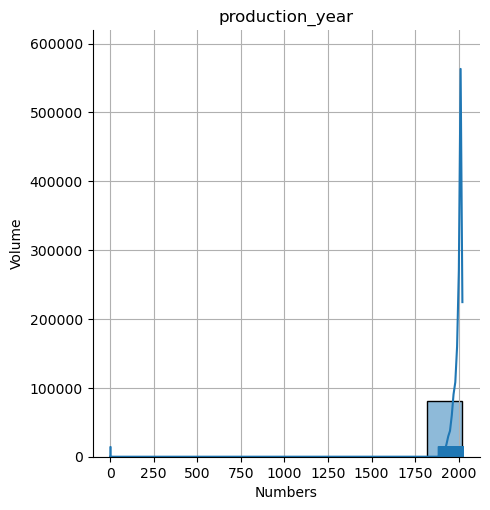

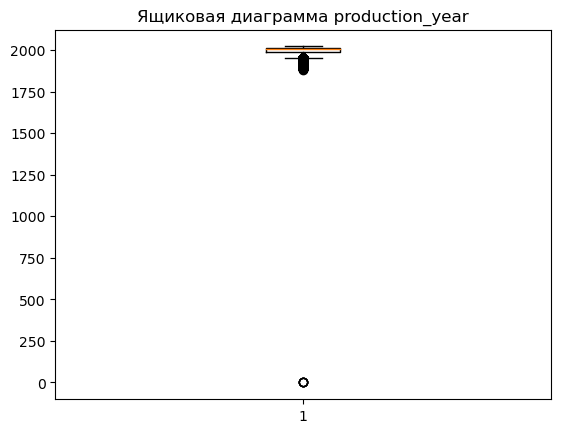

0.0 1988.0 1996.5725747448569 2013.0 2021.0
Межквартильный размах: 1950.5 2050.5




budget


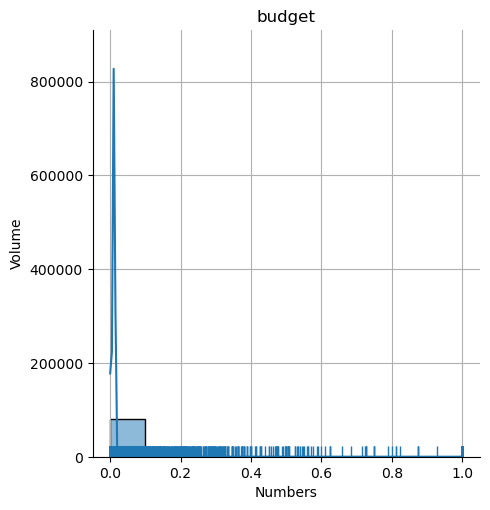

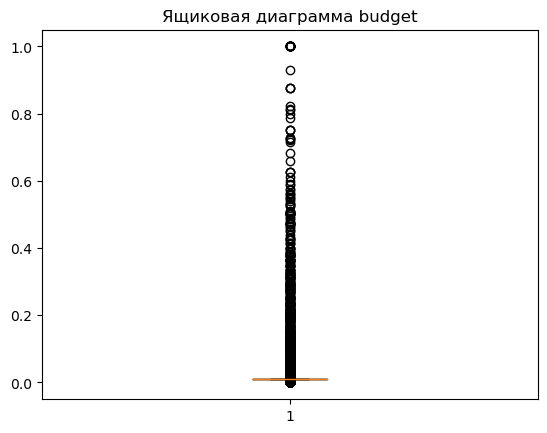

0.0 0.010748973149110603 0.010748973149110606 0.010748973149110603 1.0
Межквартильный размах: 0.010748973149110603 0.010748973149110603




world_box


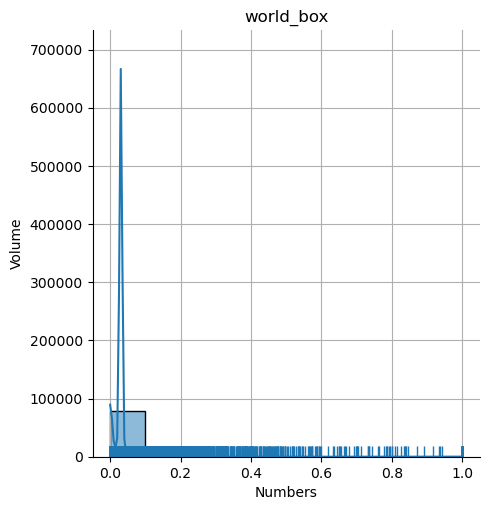

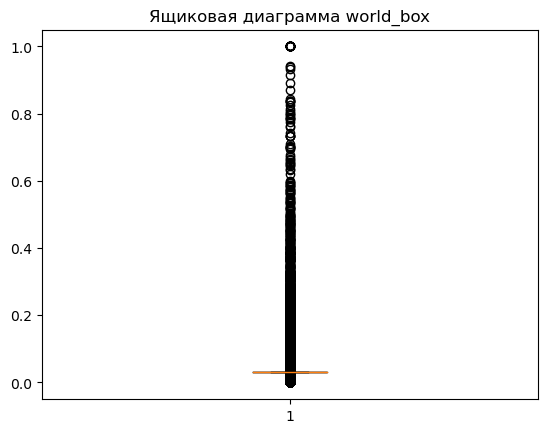

1.457950385275545e-09 0.030324173206087192 0.0303241732060872 0.030324173206087192 1.0
Межквартильный размах: 0.030324173206087192 0.030324173206087192




rating_imdb_count


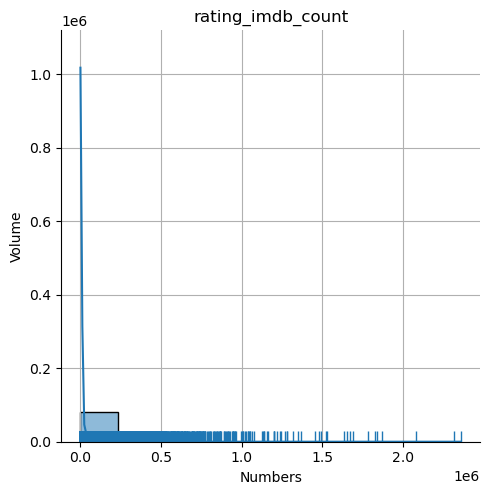

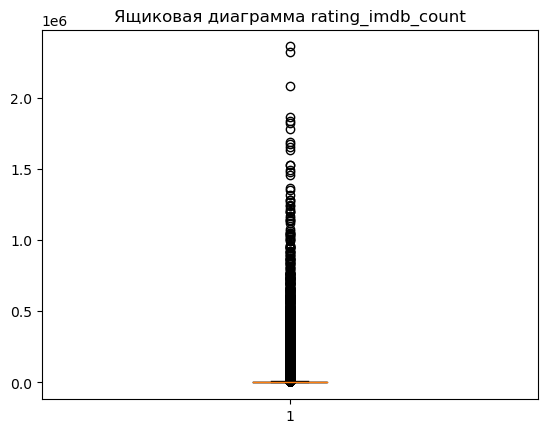

0.0 79.0 11586.567887302985 3074.0 2361710.0
Межквартильный размах: -4413.5 7566.5




rating_kinopoisk_count


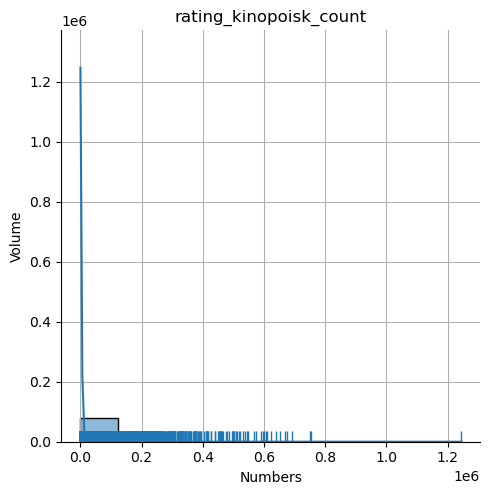

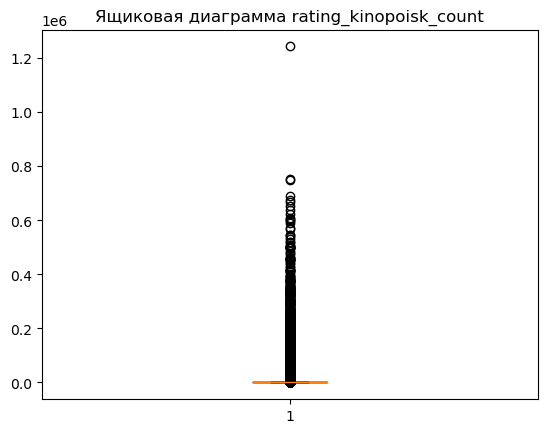

2.0 72.0 5096.60740814226 1094.0 1243611.0
Межквартильный размах: -1461.0 2627.0




rating_worldwide_critics_count


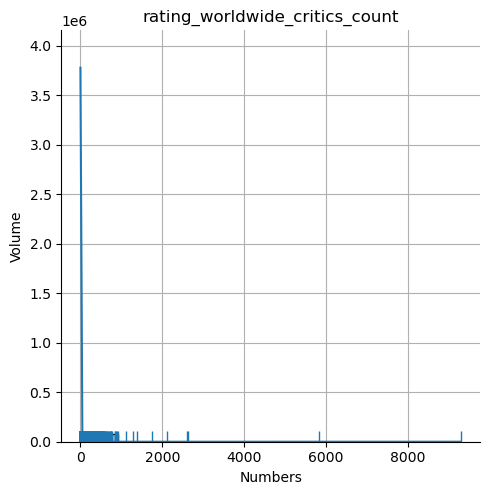

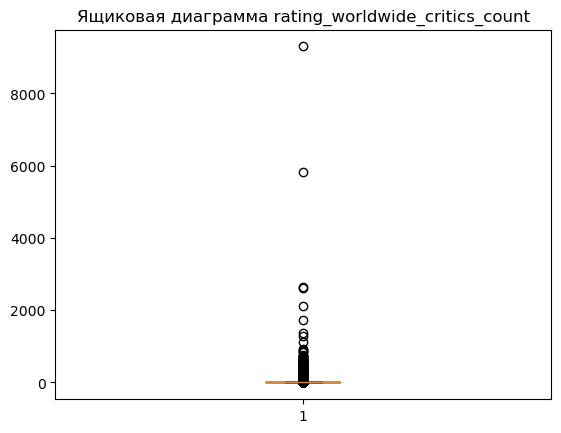

0.0 0.0 14.166639798613609 0.0 9299.0
Межквартильный размах: 0.0 0.0




duration


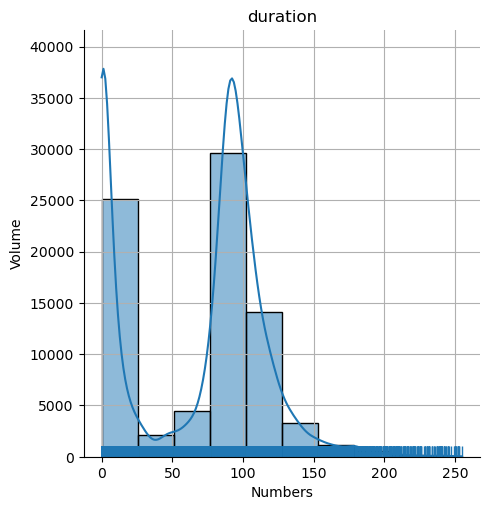

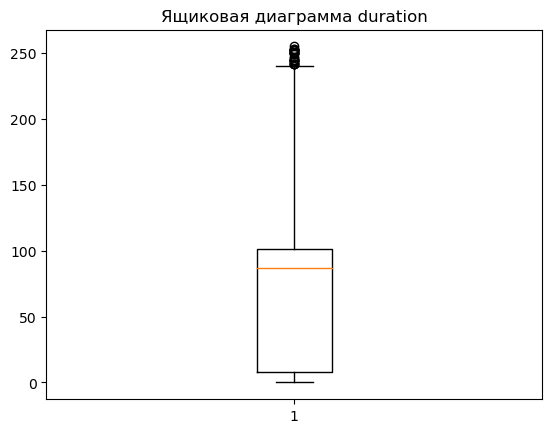

0.0 8.0 68.66159893850522 101.0 255.0
Межквартильный размах: -131.5 240.5




budget|world_box


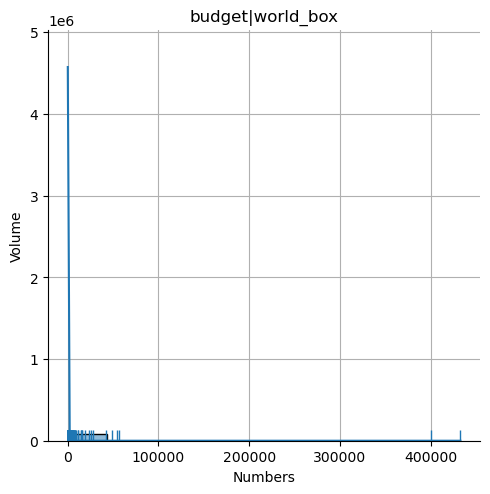

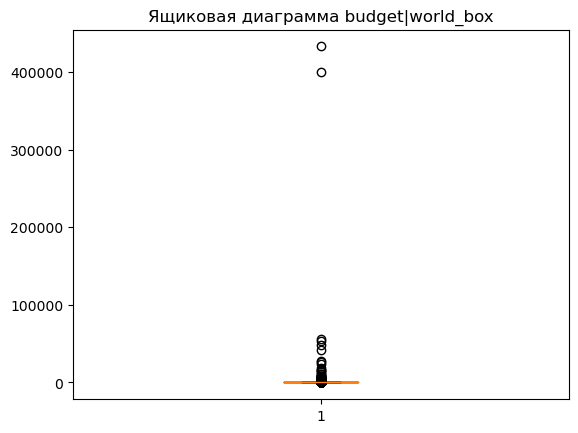

0.0 139.77003625797485 183.91152355216033 219.2409804406933 432833.99673898856
Межквартильный размах: 20.56361998389717 338.447396714771






,id,type,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,...,'семейный','спорт','ток-шоу','триллер','ужасы','фантастика','фильм-нуар','фэнтези','церемония',year_outlier_1920
0,447301,True,2010.0,0.018824,0.301913,2084916,8.8,749753,8.660,359,...,0,0,0,1,0,1,0,0,0,False
1,361,True,1999.0,0.004200,0.047405,1869371,8.8,596063,8.641,177,...,0,0,0,1,0,0,0,0,0,False
2,258687,True,2014.0,0.000265,0.327768,1529450,8.6,667884,8.600,366,...,0,0,0,0,0,1,0,0,0,False
3,435,True,1999.0,0.004000,0.134808,1158184,8.6,652888,9.061,134,...,0,0,0,0,0,0,0,1,0,False
4,2213,True,1997.0,0.013333,1.000000,1053998,7.8,546983,8.363,193,...,0,0,0,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80636,94411,True,1969.0,0.010749,0.030324,704,6.6,229,6.779,0,...,0,0,0,0,0,0,0,0,0,False
80637,94309,True,1999.0,0.010749,0.030324,438,7.3,213,7.081,0,...,0,0,0,0,0,0,0,0,0,False
80638,9428,True,1989.0,0.010749,0.007046,7062,6.5,325,6.500,19,...,0,0,0,0,0,0,0,0,0,False
80639,940097,True,2017.0,0.010749,0.000005,1450,5.7,146,6.400,47,...,0,0,0,0,0,0,0,0,0,False


In [32]:
#поиск выбросов
index_array=['production_year','budget','world_box','rating_imdb_count','rating_kinopoisk_count','rating_worldwide_critics_count','duration','budget|world_box']

find_outliers(index_array, df)

In [33]:
#replace_outliers(nm, mn, mx, df)

replace_outliers('production_year', 1949, 2050, df)
replace_outliers('budget', 0.01, 0.8, df)
replace_outliers('world_box', 0, 0.8, df)
replace_outliers('rating_imdb_count', 0, 7566, df)
replace_outliers('rating_kinopoisk_count', 0, 2627, df)
replace_outliers('rating_worldwide_critics_count', 0, 1500, df)
replace_outliers('duration', 0, 240, df)
replace_outliers('budget|world_box', 0, 338, df)


production_year
low 5.476122567924505
high 0.0
all 5.476122567924505
budget
low 18.743567168065873
high 0.042162175568259325
all 18.78572934363413
world_box
low 0.0
high 0.048362495504768045
all 0.048362495504768045
rating_imdb_count
low 0.0
high 15.270147939633686
all 15.270147939633686
rating_kinopoisk_count
low 0.0
high 16.019146587963938
all 16.019146587963938
rating_worldwide_critics_count
low 0.0
high 0.007440383923810468
all 0.007440383923810468
duration
low 0.0
high 0.03472179164444885
all 0.03472179164444885
budget|world_box
low 0.0
high 0.5629890502349921
all 0.5629890502349921


,id,type,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,...,'церемония',year_outlier_1920,production_year_outlier,budget_outlier,world_box_outlier,rating_imdb_count_outlier,rating_kinopoisk_count_outlier,rating_worldwide_critics_count_outlier,duration_outlier,budget|world_box_outlier
0,447301,True,2010.0,0.018824,0.301913,7566,8.8,2627,8.660,359,...,0,False,0,0,0,1,1,0,0,0
1,361,True,1999.0,0.010000,0.047405,7566,8.8,2627,8.641,177,...,0,False,0,1,0,1,1,0,0,0
2,258687,True,2014.0,0.010000,0.327768,7566,8.6,2627,8.600,366,...,0,False,0,1,0,1,1,0,0,0
3,435,True,1999.0,0.010000,0.134808,7566,8.6,2627,9.061,134,...,0,False,0,1,0,1,1,0,0,0
4,2213,True,1997.0,0.013333,0.800000,7566,7.8,2627,8.363,193,...,0,False,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80636,94411,True,1969.0,0.010749,0.030324,704,6.6,229,6.779,0,...,0,False,0,0,0,0,0,0,0,0
80637,94309,True,1999.0,0.010749,0.030324,438,7.3,213,7.081,0,...,0,False,0,0,0,0,0,0,0,0
80638,9428,True,1989.0,0.010749,0.007046,7062,6.5,325,6.500,19,...,0,False,0,0,0,0,0,0,0,0
80639,940097,True,2017.0,0.010749,0.000005,1450,5.7,146,6.400,47,...,0,False,0,0,0,0,0,0,0,0


In [34]:
df[(df['production_year_outlier']==1)&(df['year_outlier_1920']==1)]['production_year_outlier'] = 0

In [35]:
index_array=['production_year', 'rating_imdb_count','rating_kinopoisk_count','rating_worldwide_critics_count','duration','budget|world_box']


for target in index_array:
    df[target]=df[target]/df[target].max()


In [36]:
df_watched=pd.merge(df, df_votes[(df_votes['user_id']==user)],how='inner', left_on='id', right_on='movie_id')
df_watched=df_watched.drop(['user_id', 'id', 'time'], axis=1)

In [37]:
corrr=df_watched.corr().abs()

#sns.heatmap(corrr, annot=True, cbar= False)

In [38]:
corrr['score']['movie_id']=0
corrr['score']['score']=0
corrr['score'][0:60]

type                                      0.089232
production_year                           0.124564
budget                                    0.026832
world_box                                 0.225907
rating_imdb_count                         0.386133
rating_imdb_value                         0.497795
rating_kinopoisk_count                    0.406222
rating_kinopoisk_value                    0.556772
rating_worldwide_critics_count            0.312216
rating_worldwide_critics_value            0.292369
duration                                  0.315320
budget|world_box                          0.340278
'великобритания'                          0.079888
'россия'                                  0.116658
'ссср'                                    0.031314
'сша'                                     0.143757
'франция'                                 0.046687
'япония'                                  0.050219
'аниме'                                   0.027052
'биография'                    

In [39]:
df.head()

,id,type,production_year,budget,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,...,'церемония',year_outlier_1920,production_year_outlier,budget_outlier,world_box_outlier,rating_imdb_count_outlier,rating_kinopoisk_count_outlier,rating_worldwide_critics_count_outlier,duration_outlier,budget|world_box_outlier
0,447301,True,0.994557,0.018824,0.301913,1.0,8.8,1.0,8.660,0.239333,...,0,False,0,0,0,1,1,0,0,0
1,361,True,0.989114,0.010000,0.047405,1.0,8.8,1.0,8.641,0.118000,...,0,False,0,1,0,1,1,0,0,0
2,258687,True,0.996536,0.010000,0.327768,1.0,8.6,1.0,8.600,0.244000,...,0,False,0,1,0,1,1,0,0,0
3,435,True,0.989114,0.010000,0.134808,1.0,8.6,1.0,9.061,0.089333,...,0,False,0,1,0,1,1,0,0,0
4,2213,True,0.988125,0.013333,0.800000,1.0,7.8,1.0,8.363,0.128667,...,0,False,0,0,1,1,1,0,0,0


In [40]:

df_unwatch=df[~df['id'].isin(df_votes[df_votes['user_id']==user]['movie_id'])]
ids_unwatch=df_unwatch['id']
df_unwatch=df_unwatch[corrr['score'].index[:-2]]

In [41]:
y=df_watched[['score', 'movie_id']]

In [42]:
x=df_watched.drop(corrr['score'][corrr['score']<0.1].index, axis=1)
df_unwatch=df_unwatch.drop(corrr['score'][corrr['score']<0.1].index[:-2], axis=1)
x.head()

,production_year,world_box,rating_imdb_count,rating_imdb_value,rating_kinopoisk_count,rating_kinopoisk_value,rating_worldwide_critics_count,rating_worldwide_critics_value,duration,budget|world_box,...,'криминал','новости','триллер','ужасы','церемония',budget_outlier,rating_imdb_count_outlier,rating_kinopoisk_count_outlier,rating_worldwide_critics_count_outlier,duration_outlier
0,0.994557,0.301913,1.0,8.8,1.0,8.660,0.239333,8.1,0.616667,0.000571,...,0,0,1,0,0,0,1,1,0,0
1,0.989114,0.047405,1.0,8.8,1.0,8.641,0.118000,7.4,0.579167,0.001848,...,1,0,1,0,0,1,1,1,0,0
2,0.996536,0.327768,1.0,8.6,1.0,8.600,0.244000,7.1,0.704167,0.000720,...,0,0,0,0,0,1,1,1,0,0
3,0.989114,0.134808,1.0,8.6,1.0,9.061,0.089333,6.8,0.787500,0.000619,...,1,0,0,0,0,1,1,1,0,0
4,0.994062,0.800000,1.0,7.8,1.0,7.936,0.212667,7.4,0.675000,0.000256,...,0,0,0,0,0,0,1,1,0,0


In [43]:
#Разбить выборку на обучающую и тестовую.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [44]:

krr = KernelRidge(alpha=1.0)
krr.fit(x_train, y_train['score'])

pred_pop=krr.predict(x_test)

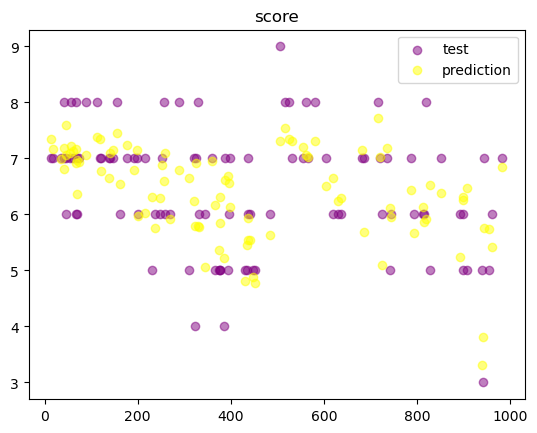

In [45]:
plt.scatter(
    x_test.index, y_test['score'], c="purple", alpha=0.5, label="test"
)
plt.scatter(
    x_test.index, pred_pop, c="yellow", alpha=0.5, label="prediction"
)
plt.title("score")
plt.legend()
plt.show()

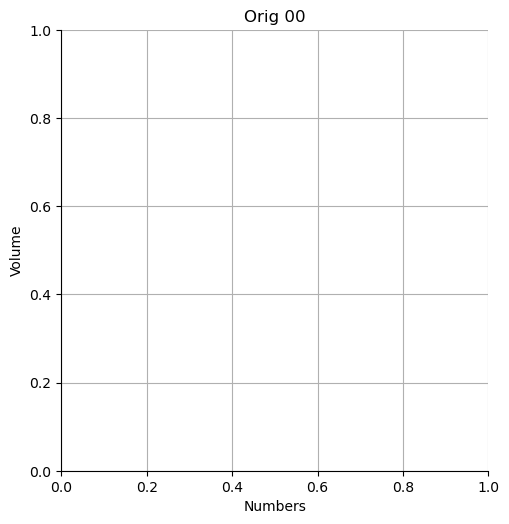

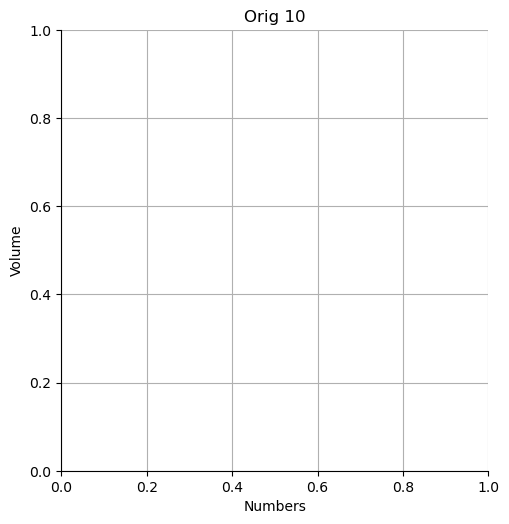

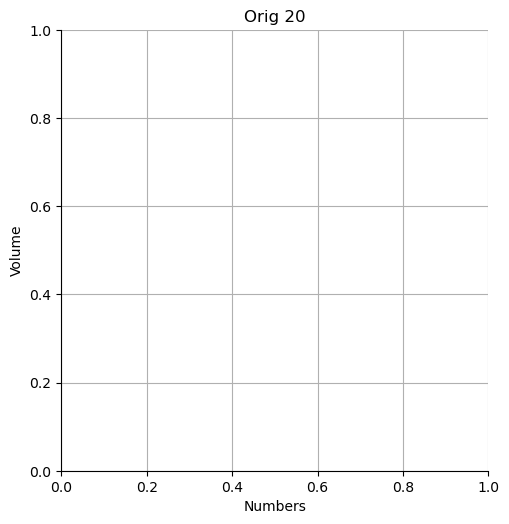

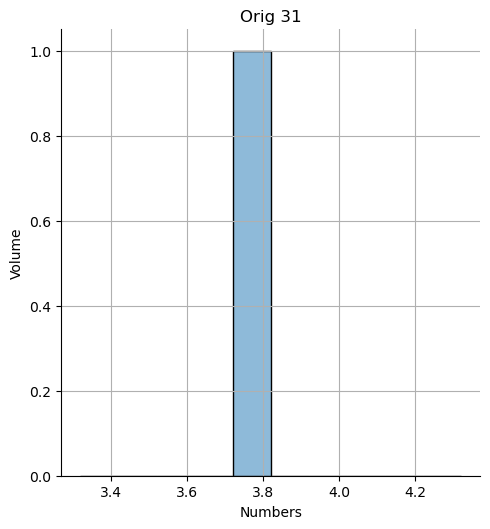

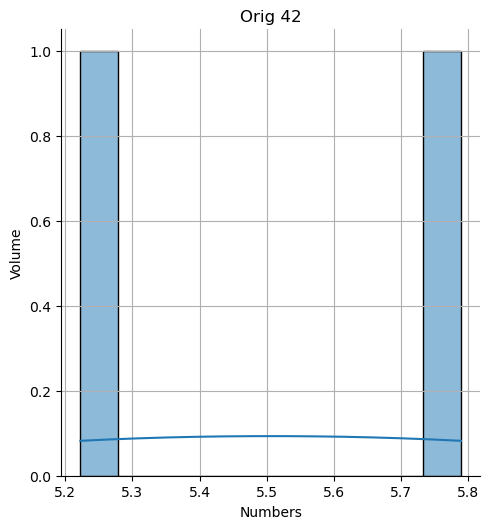

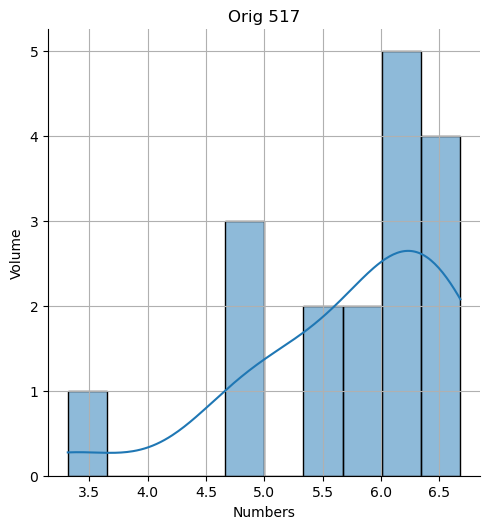

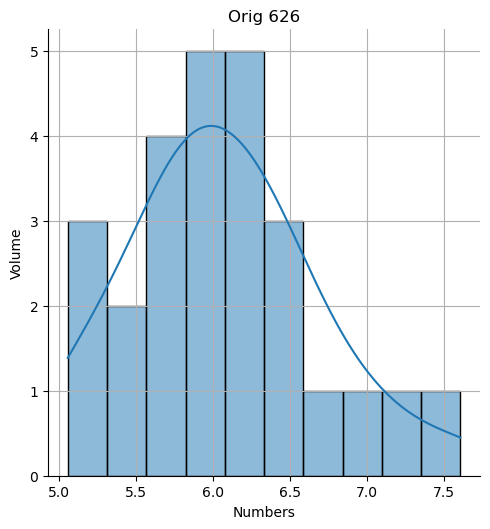

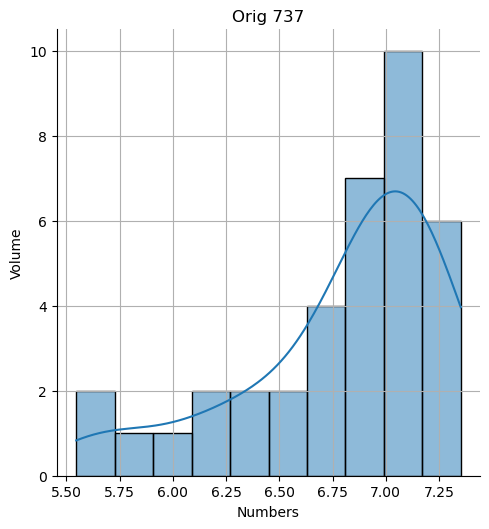

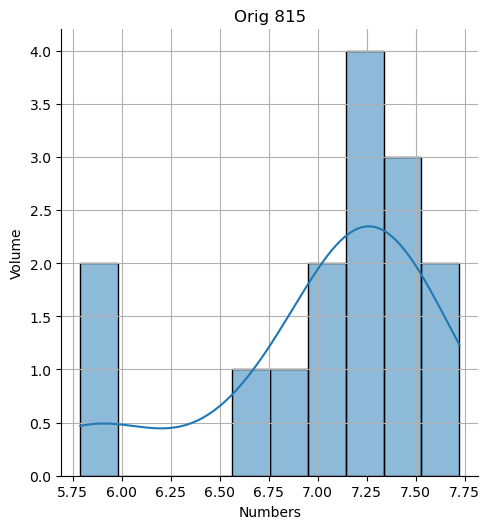

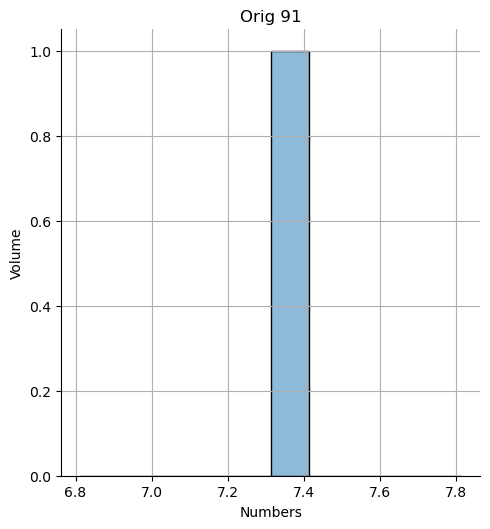

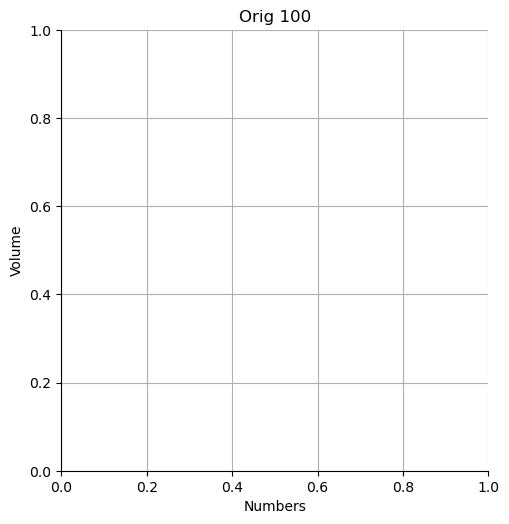

In [46]:
for i in range (11):
    
    sns.displot(pred_pop[y_test['score']==i],kde=True, bins=10)
    plt.xlabel('Numbers')
    plt.ylabel('Volume')
    plt.title('Orig '+str(i)+''+str(sum(y_test['score']==i)))
    plt.grid(True)
    plt.show()

In [47]:
y_pred_1=(pred_pop>7)#*1
y_test_1=(y_test['score']>7)*1

F-мерa: 0.5217391304347827
Достоверность accuracy: 0.7777777777777778
Точность precision: 0.4
Полнота recall: 0.75


Text(0.5, 23.52222222222222, 'Предсказанные значения')

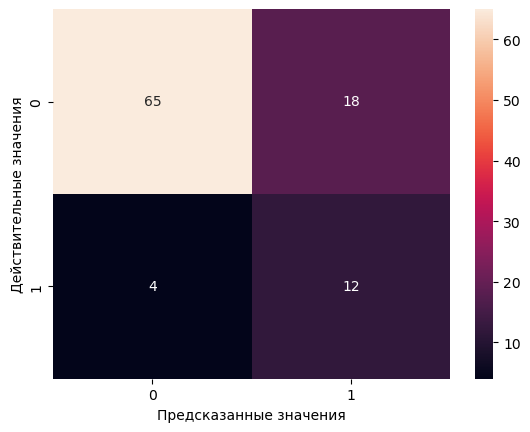

In [48]:

#Создайте матрицу ошибок
res_matrix = confusion_matrix(y_test_1, y_pred_1)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_1, y_pred_1)),annot=True)


print(f'F-мерa: {f1_score(y_test_1, y_pred_1)}')
print(f'Достоверность accuracy: {accuracy_score(y_test_1, y_pred_1)}')
print(f'Точность precision: {precision_score(y_true=y_test_1, y_pred=y_pred_1, average="binary", pos_label=1)}')
print(f'Полнота recall: {recall_score(y_test_1, y_pred_1, average="binary", pos_label=1)}')

plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


In [49]:


pred_pop=krr.predict(df_unwatch)

In [50]:
mov_ids_recommended_2=pd.DataFrame(ids_unwatch).join(
    pd.DataFrame(pred_pop), how='inner').sort_values(by=0,ascending=False)[:10]['id'].values
mov_ids_recommended_2

array([    339,    4996, 1112295,  409118,  226043,  291679, 1234852,
        589108,  533055,   95530], dtype=int64)

In [51]:
df=pd.read_csv('movie_info.csv',sep='|').merge(pd.read_csv('tags.csv',sep='|'), left_on='id', right_on='id', how='left')
print('По контенту')
for i in (mov_ids_recommended_2):
    k=df[df['id']==i]
    print('Название: '+str(k['title_russian'].item())+'. Тип: '+str(k['type'].item())+'. Год: '+str(k['production_year'].item())+'. Рейтинг: '+str(k['rating_imdb_value'].item())+'. Жанр: '+str(k['genre'].item())[1:-1]+'. Теги: '+str(k['tags'].item())[1:-1],'\n\n')#+' '+k['']

По контенту
Название: Индиана Джонс: В поисках утраченного ковчега. Тип: Film. Год: 1981.0. Рейтинг: 8.4. Жанр: 'приключения', 'боевик', 'комедия'. Теги: '1930-е', '1936 год', 'Авиакатастрофа', 'Автокатастрофа', 'Автомобиль', 'Автомобильная погоня', 'Агент ФБР', 'Актер, играющий несколько ролей', 'Алкоголь', 'Амазонка', 'Американский индеец', 'Американцы за границей', 'Артефакт', 'Археолог', 'Археологические раскопки', 'Археология', 'Бар', 'Биплан', 'Битва на мечах', 'Блик в объективе камеры', 'Блокбастер', 'Божественное возмездие', 'Бондаж', 'Босиком', 'Боязнь змей', 'Брошенный через ветровое стекло', 'Быстрая реакция', 'Вашингтон, округ Колумбия', 'Вера', 'Веревка', 'Вермахт', 'Взрыв', 'Взрывающаяся голова', 'Взрывающийся грузовик', 'Винтовой самолет', 'Вождение', 'Волшебство', 'Восточный базар', 'Выбитый кнутом из руки пистолет', 'Выстрел в голову', 'Выстрел в плечо', 'Галька', 'Героиня', 'Герой', 'Герой боевика', 'Герой-одиночка', 'Гидросамолет', 'Горящий человек', 'Гробница', 'Гру

In [52]:
print('По сходству пользователей')
for i in (mov_ids_recommended):
    k=df[df['id']==i]
    print('Название: '+str(k['title_russian'].item())+'. Тип: '+str(k['type'].item())+'. Год: '+str(k['production_year'].item())+'. Рейтинг: '+str(k['rating_imdb_value'].item())+'. Жанр: '+str(k['genre'].item())[1:-1]+'. Теги: '+str(k['tags'].item())[1:-1],'\n\n')#+' '+k['']

По сходству пользователей
Название: Одна встреча. Тип: Film. Год: 2014.0. Рейтинг: 6.3. Жанр: 'драма', 'мелодрама'. Теги: 'Iphone', 'Адвокат по бракоразводным процессам', 'Вечеринка в честь дня рождения', 'Видеоигра', 'Домашняя работа', 'Европа', 'Женатый человек', 'Женская нагота', 'Женщина в ванне', 'Женщина топлесс', 'Изучение', 'Интернет-видео', 'Курение сигарет', 'Любовный треугольник', 'Мать-одиночка', 'На следующее утро', 'Нагота', 'Недоверчивая жена', 'Номер в отеле', 'Ноутбук', 'Ночной клуб', 'Отношения матери и дочери', 'Отношения матери и сына', 'Отношения мужа и жены', 'Отношения отца и дочери', 'Париж, Франция', 'Пение в машине', 'Писатель-женщина', 'Поджигание сигареты женщине', 'Подразумеваемый секс', 'Поездка на поезде', 'Поездка на такси', 'Поиски через интернет', 'Постельная сцена', 'Поцелуй во время секса', 'Путешествие', 'Развод', 'Разговор о сексе', 'Разделение экрана на части', 'Рандеву', 'Реальность против фантазий', 'Роскошный отель', 'Скрытая реклама товара в к